# TP1: Parte 1
### Nombre: Pablo Segovia

In [1]:
# Importamos librerías que vamos a utilizar
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Punto 1
#### Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
# Generamos la función que permita hacer el cambio a coordenadas cromáticas
def cambio_coord_crom(img):
    # Modificar a flotantes los valores
    img = img[...,::-1]/255
    
    # Realizar un split en canales
    img_r, img_g, img_b = cv.split(img)
       
    # Sumar los 3 canales para usarlos como divisor
    color_sum = img_r + img_g + img_b

    # Clipar la suma para que no existan valores 0 en el dividendo
    np.clip(color_sum, 0.0000001, 255, color_sum)

    # Crear imagen modificada con el cambio de coordenadas    
    img_r_mod = np.divide(img_r, color_sum)
    img_g_mod = np.divide(img_g, color_sum)
    img_b_mod = np.divide(img_b, color_sum)

    # Pasar los valores a uint8
    img_r_mod = (img_r_mod*255).astype('uint8')
    img_g_mod = (img_g_mod*255).astype('uint8')
    img_b_mod = (img_b_mod*255).astype('uint8')

    # Creamos una merge de las coordenadas
    img_mod = cv.merge((img_r_mod, img_g_mod, img_b_mod))
    
    return img_mod

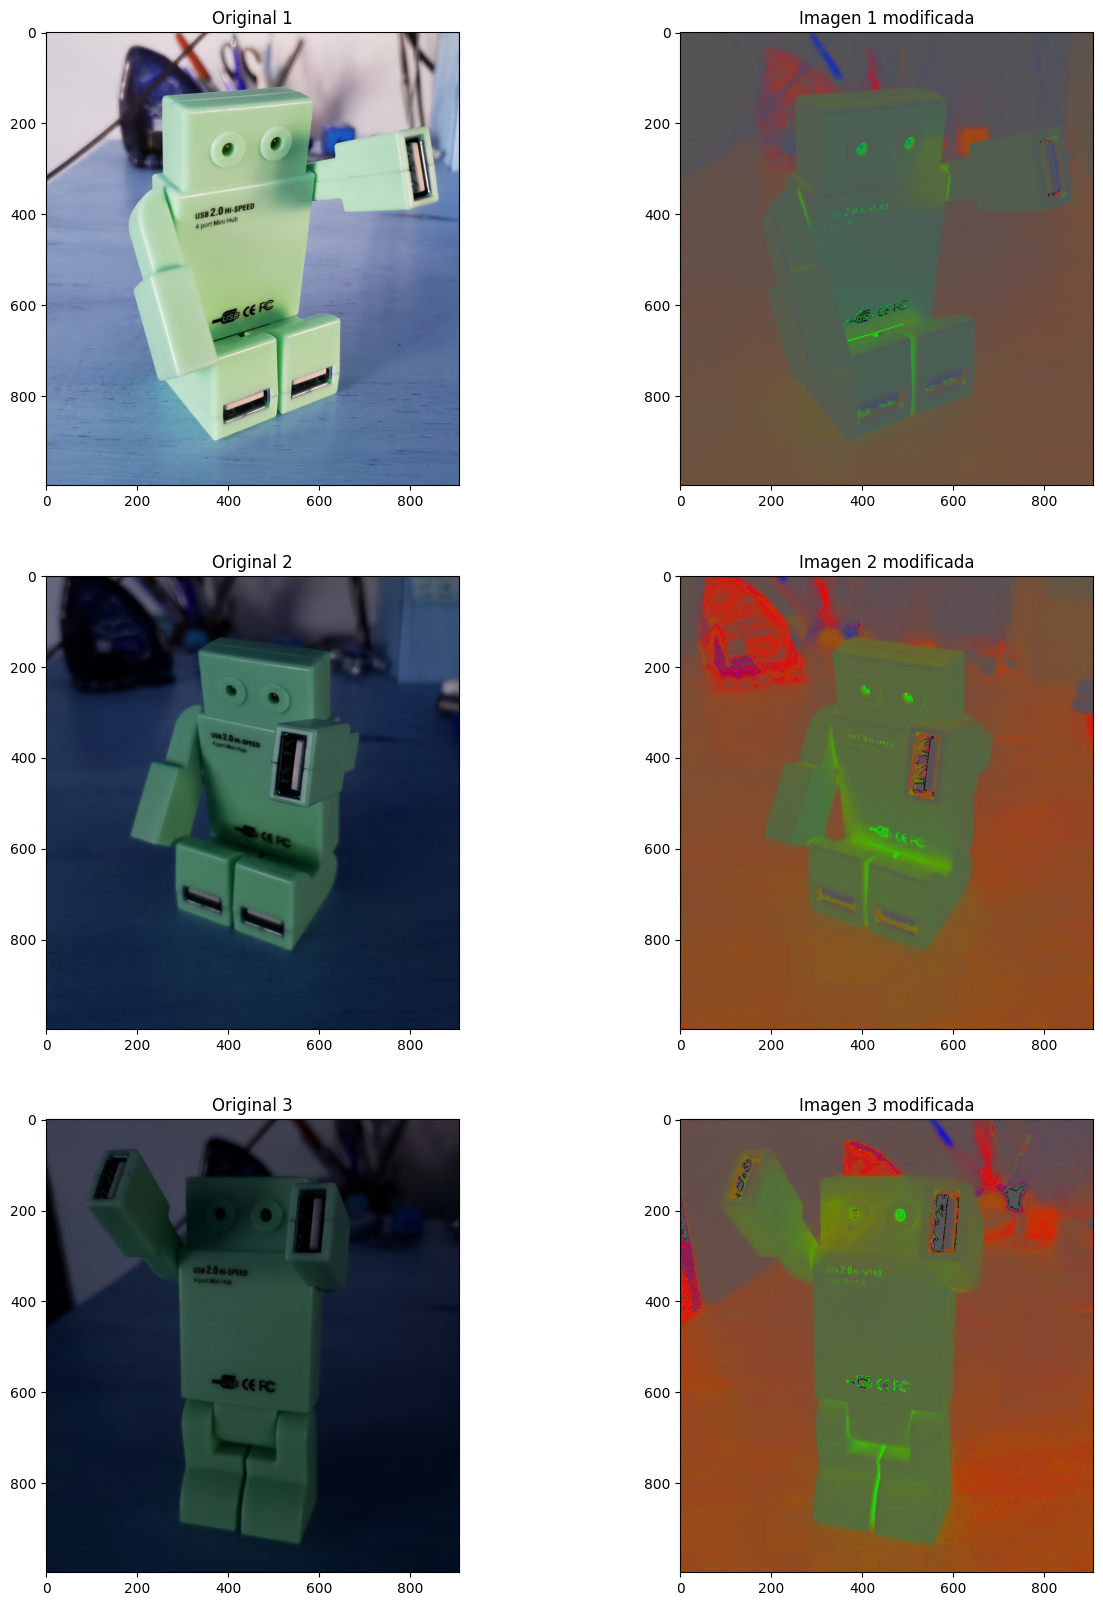

In [3]:
# Inicializar las imagenes
img1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img3 = cv.imread('coord_cromaticas/CoordCrom_3.png')

# Modificar las imagenes con las coordenadas cromáticas nuevas
img1_mod = cambio_coord_crom(img1)
img2_mod = cambio_coord_crom(img2)
img3_mod = cambio_coord_crom(img3)

# Nueva figura
fig = plt.figure(figsize=(15,20))

# Imagen original 1
ax1=plt.subplot(321)
ax1.imshow(img1, vmin=0, vmax=255)
ax1.set_title('Original 1')

# Imagen modificada 1
ax2=plt.subplot(322)
ax2.imshow(img1_mod, vmin=0, vmax=255)
ax2.set_title('Imagen 1 modificada')

# Imagen original 2
ax3=plt.subplot(323)
ax3.imshow(img2, vmin=0, vmax=255)
ax3.set_title('Original 2')

# Imagen modificada 2
ax4=plt.subplot(324)
ax4.imshow(img2_mod, vmin=0, vmax=255)
ax4.set_title('Imagen 2 modificada')

# Imagen original 3
ax5=plt.subplot(325)
ax5.imshow(img3, vmin=0, vmax=255)
ax5.set_title('Original 3')

# Imagen modificada 3
ax6=plt.subplot(326)
ax6.imshow(img3_mod, vmin=0, vmax=255)
ax6.set_title('Imagen 3 modificada')
    
plt.show()

## Punto 2
#### Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [4]:
# Generamos la función de aplicación del algoritmo White Patch
def white_patch(img):
    # Modificar la imagen a RGB
    img = img[...,::-1]

    # Generamos los canales
    img_r, img_g, img_b = cv.split(img)

    # Buscar los máximos de cada canal
    max_r = np.max(img_r)
    max_g = np.max(img_g)
    max_b = np.max(img_b)

    # Modificar los canales con estos máximos
    img_r_mod = 255/max_r * img_r
    img_g_mod = 255/max_g * img_g
    img_b_mod = 255/max_b * img_b

    # Generar la imagen modificada
    img_WP = cv.merge((img_r_mod.astype('uint8'), img_g_mod.astype('uint8'), img_b_mod.astype('uint8')))
    np.clip(img_WP, 0, 255, img_WP)
    
    return img_WP

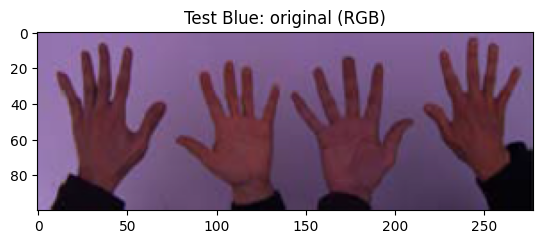

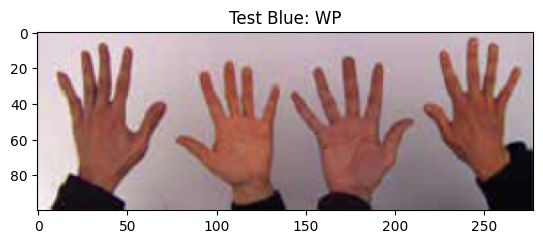

In [5]:
# Generamos la imagen test_blue
test_blue = cv.imread('white_patch/test_blue.png')

# Original (RGB)
plt.figure()
plt.imshow(test_blue[...,::-1])
plt.title('Test Blue: original (RGB)')
plt.show()

# Modificada con WP
test_blue_mod = white_patch(test_blue)
plt.figure()
plt.imshow(test_blue_mod)
plt.title('Test Blue: WP')
plt.show()

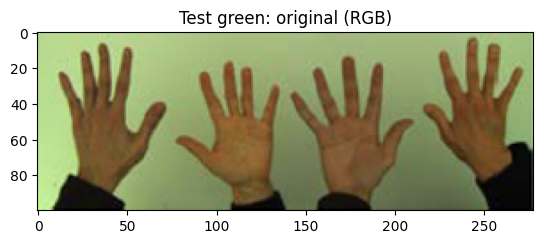

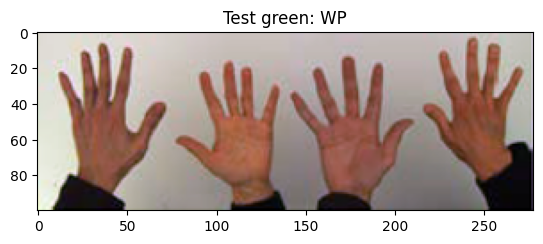

In [6]:
# Probamos con el resto de las imagenes
# Test green
test_green = cv.imread('white_patch/test_green.png')

# Original (RGB)
plt.figure()
plt.imshow(test_green[...,::-1])
plt.title('Test green: original (RGB)')
plt.show()

# Modificada con WP
test_green_mod = white_patch(test_green)
plt.figure()
plt.imshow(test_green_mod)
plt.title('Test green: WP')
plt.show()

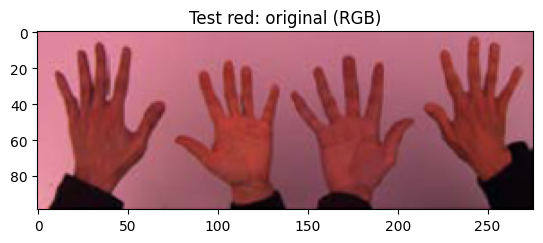

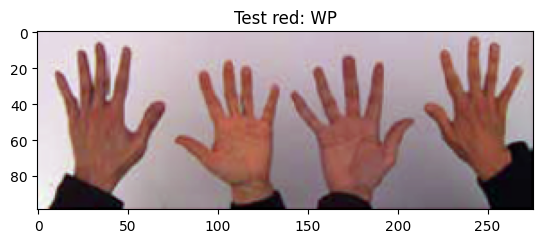

In [7]:
# Test red
test_red = cv.imread('white_patch/test_red.png')

# Original (RGB)
plt.figure()
plt.imshow(test_red[...,::-1])
plt.title('Test red: original (RGB)')
plt.show()

# Modificada con WP
test_red_mod = white_patch(test_red)
plt.figure()
plt.imshow(test_red_mod)
plt.title('Test red: WP')
plt.show()

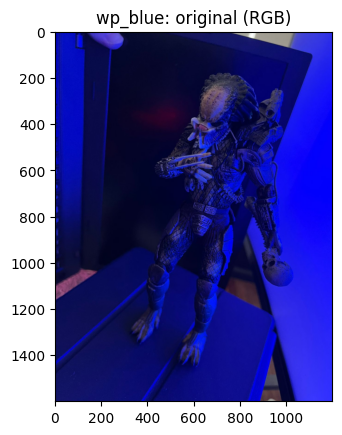

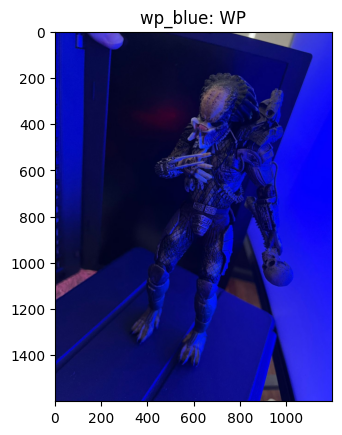

In [8]:
# wp_blue
wp_blue = cv.imread('white_patch/wp_blue.jpg')

# Original (RGB)
plt.figure()
plt.imshow(wp_blue[...,::-1])
plt.title('wp_blue: original (RGB)')
plt.show()

# Modificada con WP
wp_blue_mod = white_patch(wp_blue)
plt.figure()
plt.imshow(wp_blue_mod)
plt.title('wp_blue: WP')
plt.show()

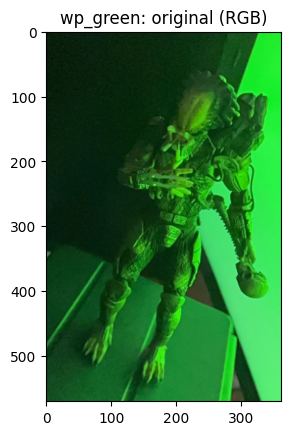

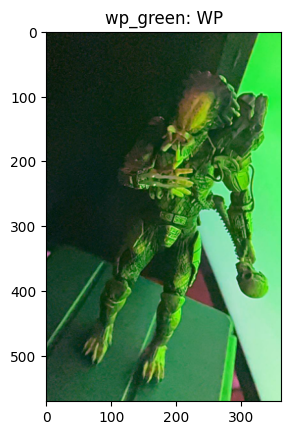

In [9]:
# wp_green
wp_green = cv.imread('white_patch/wp_green.png')

# Original (RGB)
plt.figure()
plt.imshow(wp_green[...,::-1])
plt.title('wp_green: original (RGB)')
plt.show()

# Modificada con WP
wp_green_mod = white_patch(wp_green)
plt.figure()
plt.imshow(wp_green_mod)
plt.title('wp_green: WP')
plt.show()

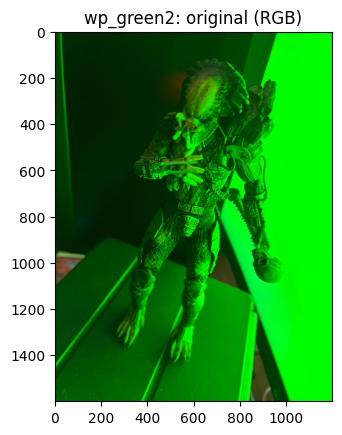

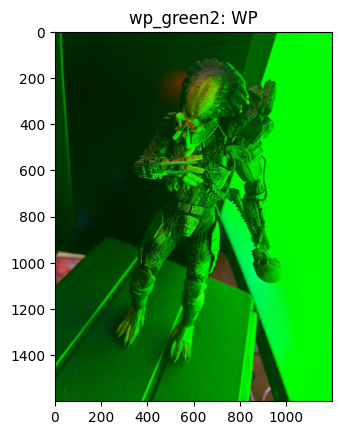

In [10]:
# wp_green2
wp_green2 = cv.imread('white_patch/wp_green2.jpg')

# Original (RGB)
plt.figure()
plt.imshow(wp_green2[...,::-1])
plt.title('wp_green2: original (RGB)')
plt.show()

# Modificada con WP
wp_green2_mod = white_patch(wp_green2)
plt.figure()
plt.imshow(wp_green2_mod)
plt.title('wp_green2: WP')
plt.show()

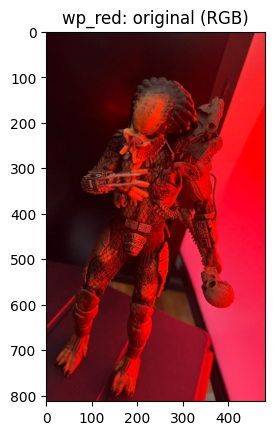

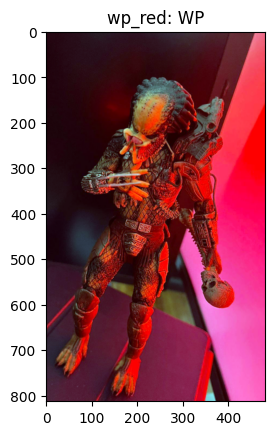

In [11]:
# wp_red
wp_red = cv.imread('white_patch/wp_red.png')

# Original (RGB)
plt.figure()
plt.imshow(wp_red[...,::-1])
plt.title('wp_red: original (RGB)')
plt.show()

# Modificada con WP
wp_red_mod = white_patch(wp_red)
plt.figure()
plt.imshow(wp_red_mod)
plt.title('wp_red: WP')
plt.show()

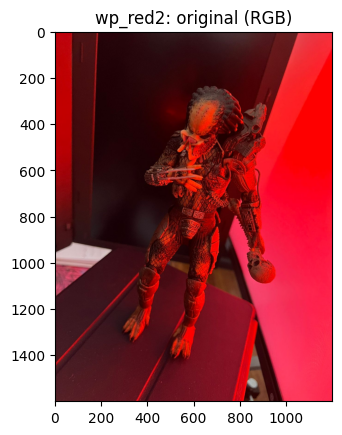

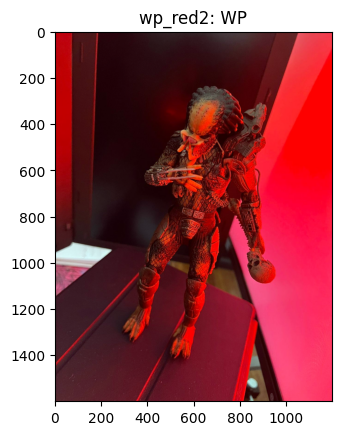

In [12]:
# wp_red2
wp_red2 = cv.imread('white_patch/wp_red2.jpg')

# Original (RGB)
plt.figure()
plt.imshow(wp_red2[...,::-1])
plt.title('wp_red2: original (RGB)')
plt.show()

# Modificada con WP
wp_red2_mod = white_patch(wp_red2)
plt.figure()
plt.imshow(wp_red2_mod)
plt.title('wp_red2: WP')
plt.show()

## Punto 3
#### Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.
- Los resultados están en el punto 2.
- A simple vista, al parecer, las imágenes .jpg tienen menor impacto con el algoritmo.

In [13]:
# Probamos viendolo con OpenCV y no con Matplotlib
cv.imshow("Imagen wp_red modificada", wp_red_mod[...,::-1])
cv.waitKey(0)

cv.imshow("Imagen wp_red2 modificada", wp_red2_mod[...,::-1])
cv.waitKey(0)

-1

- Por OpenCV tampoco se ve mucho impacto del algoritmo en la imagen .jpg.

In [14]:
# Comparamos los arrays
wp_red_mod.shape, wp_red2_mod.shape

((813, 481, 3), (1600, 1200, 3))

In [15]:
np.min(wp_red2_mod), np.max(wp_red2_mod)

(0, 255)

# TP1: Parte 2

## Punto 1
#### Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

In [16]:
# Definimos una función que me permita plotear en gris
def plotear_imagen_gris(archivo_imagen: str):
    # Generamos la imagen en escala de gris
    img_gris = cv.imread(archivo_imagen, cv.COLOR_BGR2GRAY)
    
    # Ploteamos
    plt.figure()
    plt.imshow(img_gris, cmap='gray',vmin=0, vmax=255)
    plt.title(f'{archivo_imagen}')
    plt.show()
    
    return img_gris

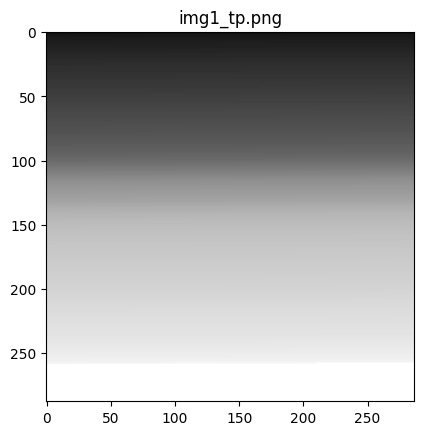

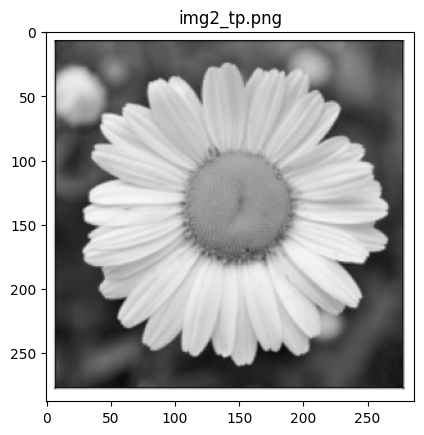

In [17]:
# Vemos las imagenes
img1 = plotear_imagen_gris('img1_tp.png')
img2 = plotear_imagen_gris('img2_tp.png')

## Punto 2
#### Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
- Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

In [18]:
# Vemos los histogramas de cada imagen
# Generamos una función que me genere el histograma
def generar_hist(img, titulo="Sin título", bins=256):
    # Generar histogramas y sacar bins
    hist, bins = np.histogram(img.ravel(),bins,[0,256])

    # Plotear el histograma
    plt.figure()
    plt.plot(hist)
    plt.title(f'{titulo} con {len(bins)-1} bins')

    return hist, bins

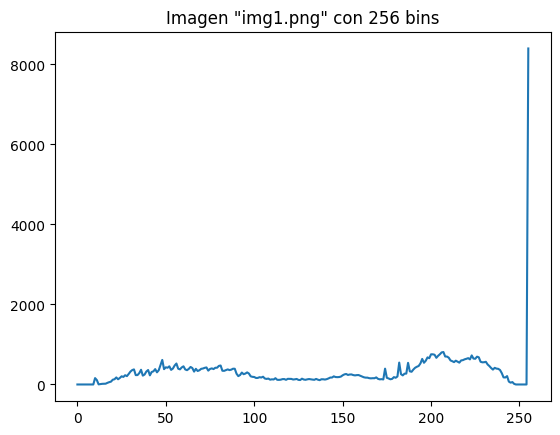

In [19]:
# Vemos el histograma de la primera imagen
hist1, bins1 = generar_hist(img1, 'Imagen "img1.png"')

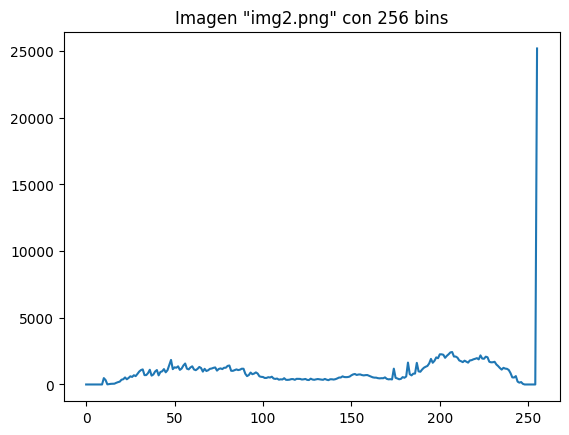

In [20]:
# Vemos el histograma de la imagen 2
hist2, bins2 = generar_hist(img2, 'Imagen "img2.png"')

In [21]:
# Analizamos el shape de ambas imágenes
img1.shape, img2.shape

((288, 287), (288, 287, 3))

- Los histogramas son similares, a pesar que las imágenes son muy distintas.
- Como la segunda imagen tiene 3 canales, se suman las frecuencias con el ravel.

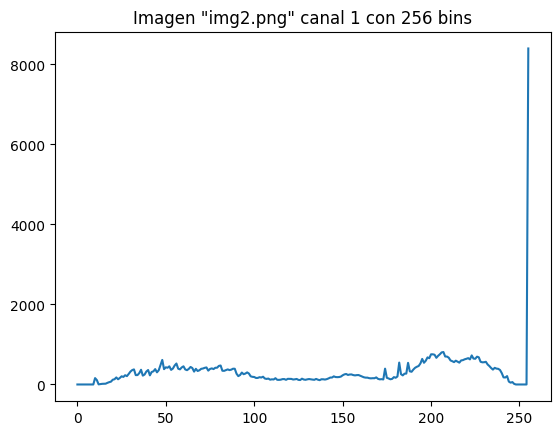

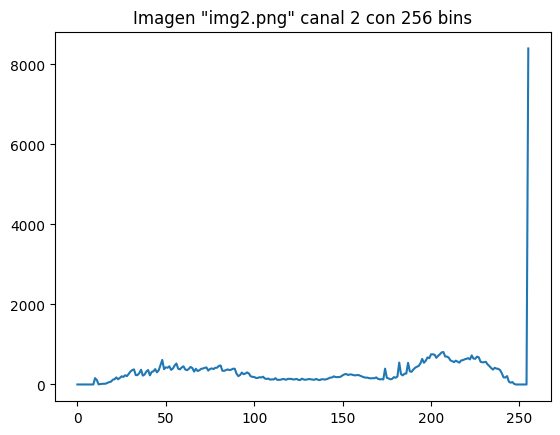

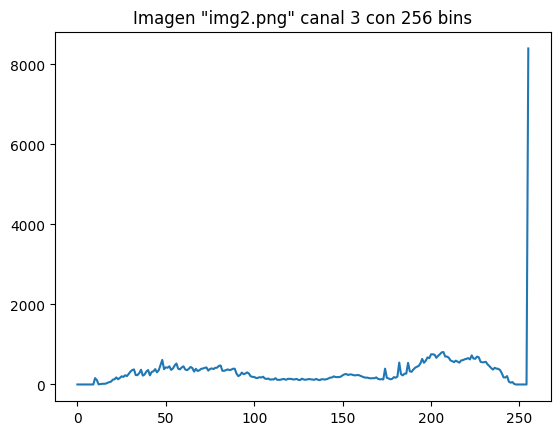

In [22]:
# Planteamos los histogramas para cada split de la imagen 2
img2_c1, img2_c2, img2_c3 = cv.split(cv.imread('img2_tp.png'))
hist21, bins21 = generar_hist(img2_c1, 'Imagen "img2.png" canal 1')
hist22, bins22 = generar_hist(img2_c2, 'Imagen "img2.png" canal 2')
hist23, bins23 = generar_hist(img2_c3, 'Imagen "img2.png" canal 3')

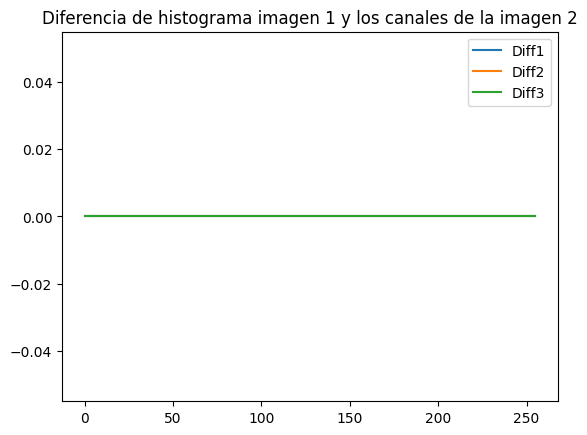

In [23]:
# Planteamos una diferencia de los histogramas entre la imagen 1 y uno de los canales de esta imagen 2
plt.figure()
diff1 = hist1 - hist21
diff2 = hist1 - hist22
diff3 = hist1 - hist23
plt.plot(diff1, label='Diff1')
plt.plot(diff2, label='Diff2')
plt.plot(diff3, label='Diff3')
plt.title('Diferencia de histograma imagen 1 y los canales de la imagen 2')
plt.legend()
plt.show()

- De esta manera, vemos que la imagen 2 tiene un stack de sí misma en 3 canales.
- Se puede decir que un histograma no es bueno si tuviera que entrenar un modelo de clasificación/detección de imágenes usando solamente estos como features.

## Punto 3
#### Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.

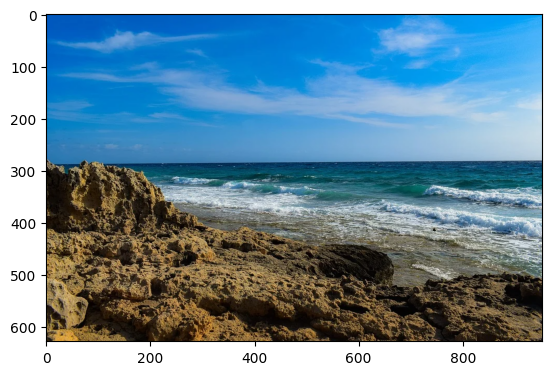

In [24]:
# Vemos la imagen original
seg = cv.imread('segmentacion.png')
seg = seg[...,::-1]
plt.figure()
plt.imshow(seg)
plt.show()

In [25]:
# Separamos la imagen en canales
seg_r, seg_g, seg_b = cv.split(seg)

# Generamos los histogramas para cada canal
hist_r, bins_r = np.histogram(seg_r.ravel(),256,[0,256])
hist_g, bins_g = np.histogram(seg_g.ravel(),256,[0,256])
hist_b, bins_b = np.histogram(seg_b.ravel(),256,[0,256])

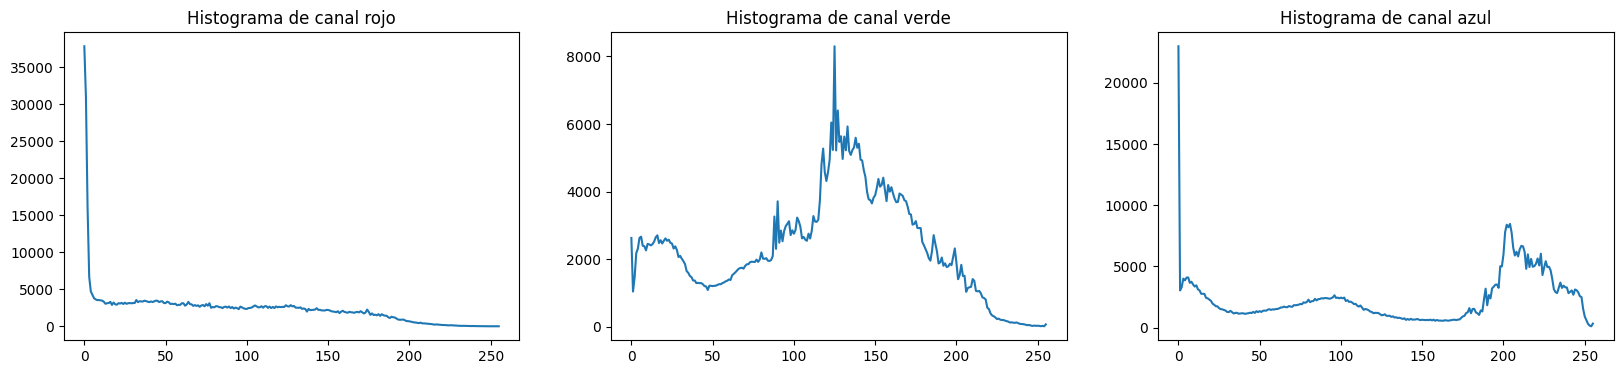

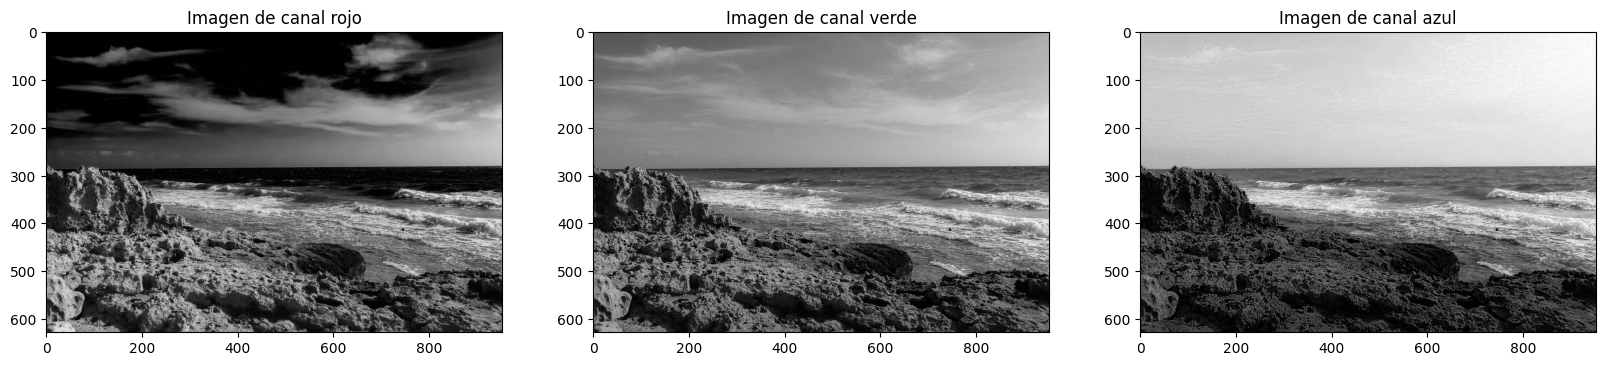

In [26]:
# Vemos las imágenes de cada histograma
fig = plt.figure(figsize=(20,4))

# Histograma rojo
ax1=plt.subplot(131)
ax1.plot(hist_r)
ax1.set_title('Histograma de canal rojo')

# Histograma verde
ax2=plt.subplot(132)
ax2.plot(hist_g)
ax2.set_title('Histograma de canal verde')

# Histograma azul
ax3=plt.subplot(133)
ax3.plot(hist_b)
ax3.set_title('Histograma de canal azul')

plt.show()

# Vemos las imágenes de cada canal y su histograma
fig = plt.figure(figsize=(20,10))

# Canal rojo
ax1=plt.subplot(131)
ax1.imshow(seg_r, cmap='gray')
ax1.set_title('Imagen de canal rojo')

# Canal verde
ax2=plt.subplot(132)
ax2.imshow(seg_g, cmap='gray')
ax2.set_title('Imagen de canal verde')

# Canal azul
ax3=plt.subplot(133)
ax3.imshow(seg_b, cmap='gray')
ax3.set_title('Imagen de canal azul')

plt.show()

- Se ve que es bastante complicado hacer una diferenciación de cielo, tierra y agua con estos canales.
- Vamos a realizar un cambio de coordenadas HSV para ver si son más diferenciables.

In [27]:
# Hacemos la prueba segmentando con HSV
seg_hsv = cv.cvtColor(seg, cv.COLOR_RGB2HSV)

# Separamos la imagen en canales
seg_h, seg_s, seg_v = cv.split(seg_hsv)

In [28]:
# Generamos los histogramas para cada canal
hist_h, bins_h = np.histogram(seg_h.ravel(),256,[0,256])
hist_s, bins_s = np.histogram(seg_s.ravel(),256,[0,256])
hist_v, bins_v = np.histogram(seg_v.ravel(),256,[0,256])

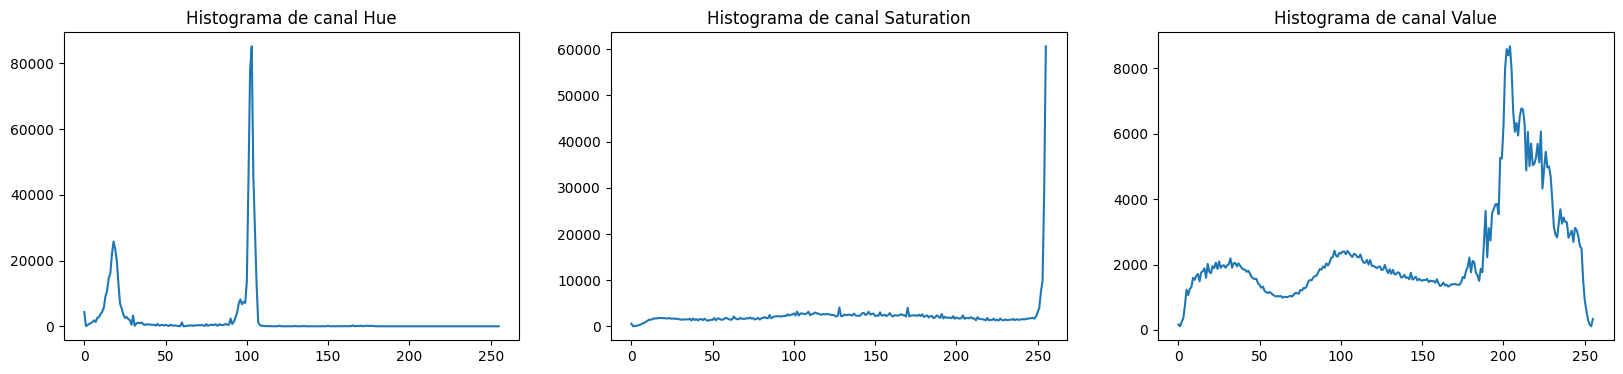

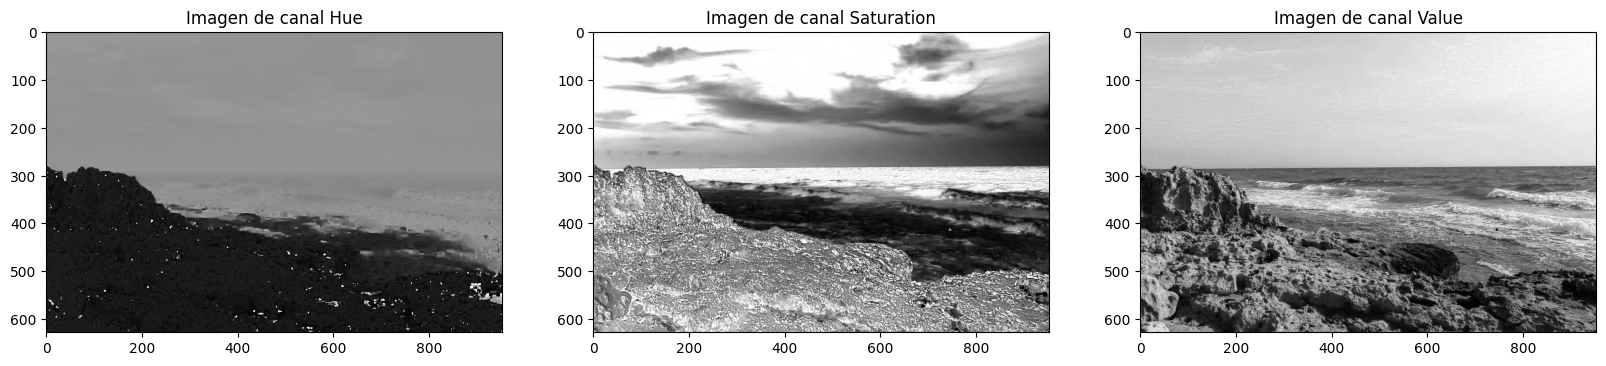

In [29]:
# Vemos las imágenes de cada histograma
fig = plt.figure(figsize=(20,4))

# Histograma Hue
ax1=plt.subplot(131)
ax1.plot(hist_h)
ax1.set_title('Histograma de canal Hue')

# Histograma Saturation
ax2=plt.subplot(132)
ax2.plot(hist_s)
ax2.set_title('Histograma de canal Saturation')

# Histograma Value
ax3=plt.subplot(133)
ax3.plot(hist_v)
ax3.set_title('Histograma de canal Value')

plt.show()

# Vemos las imágenes de cada canal y su histograma
fig = plt.figure(figsize=(20,10))

# Canal Hue
ax1=plt.subplot(131)
ax1.imshow(seg_h, cmap='gray')
ax1.set_title('Imagen de canal Hue')

# Canal Saturation
ax2=plt.subplot(132)
ax2.imshow(seg_s, cmap='gray')
ax2.set_title('Imagen de canal Saturation')

# Canal Value
ax3=plt.subplot(133)
ax3.imshow(seg_v, cmap='gray')
ax3.set_title('Imagen de canal Value')

plt.show()

- De esta manera vemos que en Hue, el primer pico es de la tierra y el segundo pico es del agua y el cielo en conjunto.
- En Saturation, no hay cambios que sean muy excluyentes (misma frecuencia de intensidad). Puede ser que nos ayude a separar el cielo del agua.
- Y en el canal de Value, se puede separar cielo y agua también.

In [30]:
# Generamos una función de segmentación que permita hacer esta segmentación
def segmentar_imagen(img):
    # Convertir la imagen a HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

    # Crear las máscaras - Elegimos los límites de cada canal mirando los histogramas correspondientes
    cielo_mask = cv.inRange(img_hsv, (50, 30, 170), (110, 255, 255))
    agua_mask = cv.inRange(img_hsv, (50, 0, 0), (110, 255, 170))
    tierra_mask = cv.inRange(img_hsv, (0, 0, 0), (50, 255, 255))

    # Mostrar las regiones segmentadas
    cielo = cv.bitwise_and(img, img, mask=cielo_mask)
    agua = cv.bitwise_and(img, img, mask=agua_mask)
    tierra = cv.bitwise_and(img, img, mask=tierra_mask)

    # Nueva figura
    fig = plt.figure(figsize=(15,10))

    # Imagen original
    ax1=plt.subplot(221)
    ax1.imshow(img, vmin=0, vmax=255)
    ax1.set_title('Original')

    # Imagen de cielo
    ax3=plt.subplot(223)
    ax3.imshow(cielo, vmin=0, vmax=255)
    ax3.set_title('Máscara de Cielo')

    # Imagen de agua
    ax2=plt.subplot(222)
    ax2.imshow(agua, vmin=0, vmax=255)
    ax2.set_title('Máscara de Agua')

    # Imagen de tierra
    ax4=plt.subplot(224)
    ax4.imshow(tierra, vmin=0, vmax=255)
    ax4.set_title('Máscara de Tierra')
    
    plt.show()

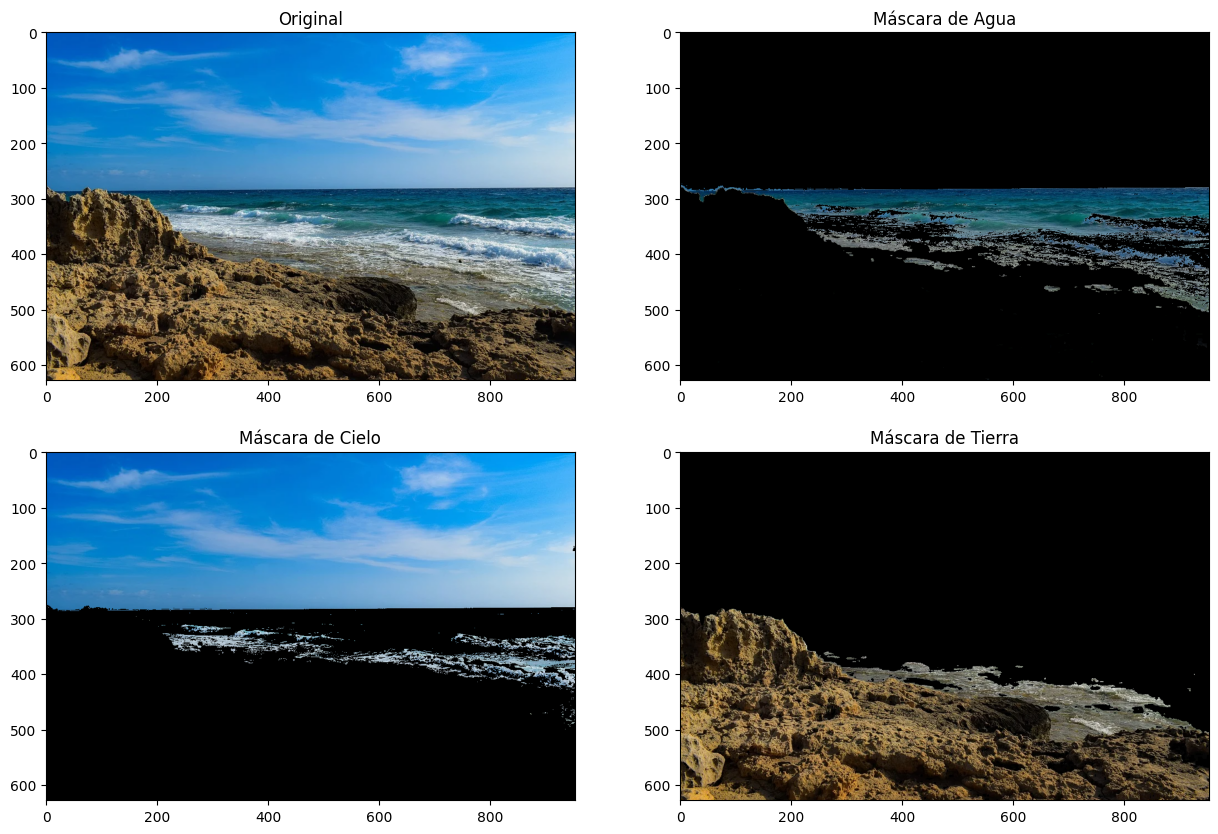

In [31]:
# Segmentamos la imagen y mostramos los resultados
segmentar_imagen(seg)

- Se generan muy buenas máscaras de segmentación para la tierra y el agua.
- Es complicado separar completamente el cielo de la espuma del agua, pero si se puede ver que está segmentado correctamente.